In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val
from scipy.optimize import curve_fit

In [2]:
filename = 'data/stokes_shift_05.csv'
data = pd.read_csv(filename, sep=',',header=1,nrows=151)
# Drop the 'Unnamed: 4' column as it contains no useful data
data = data.drop(columns=['Unnamed: 4'])
data.tail()

,Wavelength (nm),Intensity (a.u.),Wavelength (nm).1,Intensity (a.u.).1
146,NaN,NaN,545.969971,420.667816
147,NaN,NaN,547.010010,377.603302
148,NaN,NaN,548.049988,338.718384
149,NaN,NaN,548.950012,303.112579
150,NaN,NaN,550.000000,268.755066


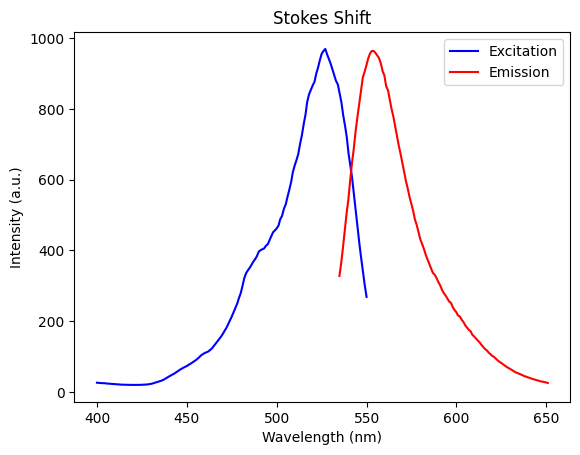

In [8]:
ecc_lambda = data['Wavelength (nm).1'].to_numpy()
ecc_int = data['Intensity (a.u.).1'].to_numpy()

emi_lambda = data['Wavelength (nm)'].to_numpy()
emi_int = data['Intensity (a.u.)'].to_numpy()

plt.plot(ecc_lambda, ecc_int, label='Excitation', color='blue')
plt.plot(emi_lambda, emi_int, label='Emission', color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.title('Stokes Shift')
plt.legend()
plt.show()


In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ecc_lambda, y=ecc_int,
                    mode='lines',
                    name='Excitation'))
fig.add_trace(go.Scatter(x=emi_lambda, y=emi_int,
                    mode='lines',
                    name='Emission'))

fig.update_layout(title='Stokes Shift',
                  xaxis_title='Wavelength (nm)',
                  yaxis_title='Intensity (a.u.)',
                  legend=dict(x=0.1, y=0.9),
                  font=dict(size=14))


fig.show()